In [1]:
symbols = ['GS', 'AAPL', 'GOOG','IBM','GLD']
SOURCE = 'yahoo'

import datetime
start_date = datetime.date(2016, 1, 1)
end_date   = datetime.date.today()

In [2]:
import numpy as np
import pandas as pd

import os
# return csv file path given SYMBOL
def symbol_to_path(symbol, base_dir='StockData'):
    return os.path.join(base_dir, '{}.csv'.format(str(symbol)))

# Get data from several csv files
def get_data(symbols, dates):
    df = pd.DataFrame(index=dates)
    if 'SPY' not in symbols:
        symbols.insert(0, 'SPY')

    for symbol in symbols:
        df_temp = pd.read_csv(symbol_to_path(symbol), index_col='Date', parse_dates=True,
                              usecols=['Date', 'Adj Close'], na_values=['nan'])    # NaN: Not a Number
        df_temp = df_temp.rename(columns={'Adj Close' : symbol})
        df = df.join(df_temp, how='left')
        if symbol == 'SPY':
            df = df.dropna(subset=['SPY'])
    return df

In [3]:
# Download data to csv files
from pandas_datareader.data import DataReader

if 'SPY' not in symbols:
    symbols.insert(0, 'SPY')

for symbol in symbols:
    DataReader(symbol, SOURCE, start_date, end_date).to_csv(symbol_to_path(symbol))

In [4]:
df = get_data(symbols, pd.date_range(start_date, end_date))
df.tail()

,SPY,GS,AAPL,GOOG,IBM,GLD
2017-04-03,235.330002,228.960007,143.699997,838.549988,174.500000,119.349998
2017-04-04,235.479996,229.259995,144.770004,834.570007,174.520004,119.620003
2017-04-05,234.779999,227.660004,144.020004,831.409973,172.880005,119.620003
2017-04-06,235.440002,228.639999,143.660004,827.880005,172.449997,119.180000
2017-04-07,235.199997,227.880005,143.339996,824.669983,172.139999,119.459999


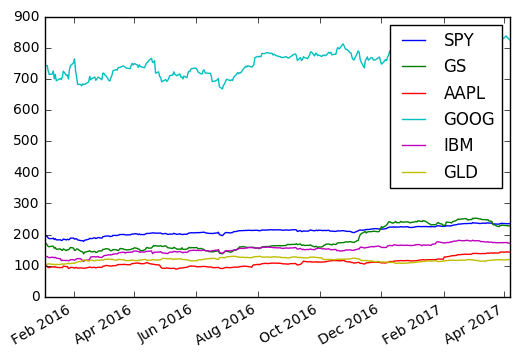

In [5]:
import matplotlib.pyplot as plt

def plot_data(df, title='Adj Close'):
    ax = df.plot(title=title, fontsize=1)
    ax.set_xlabel('Date')
    ax.set_ylabel('Price')
    plt.show()

#plot_data(df)    # For some reason, the dates on chart become too small...


df.plot()
plt.show()

In [6]:
def scale_data(df):
    # Scale using the first row of the dataframe
    return df / df.ix[0,:]

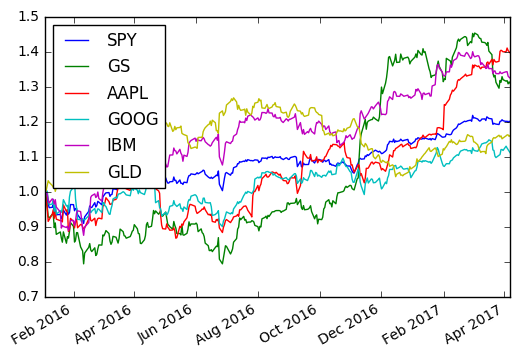

In [7]:
df_s = scale_data(df)

df_s.plot()
plt.show()